# Curva ROC

    - "é uma representação gráfica que ilustra o desempenho (ou performance) de um sistema classificador binário"
    - Quanto maior a area coberta, maior o desempenho
![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Curva_ROC.svg/461px-Curva_ROC.svg.png)

In [1]:
# Importando o metrics do sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

###  Primeiro vamos definir os valores de y_test e y_pred

In [2]:
y_test = [0,0,1,1]
y_pred = [0,1,1,1]
y_pred2 = [0,0,0,1]

### Calculando os parâmetros da curva ROC

fpr, tpr, thresholds do pred e pred2

In [3]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_pred2)

### Exibindo graficamente ambos

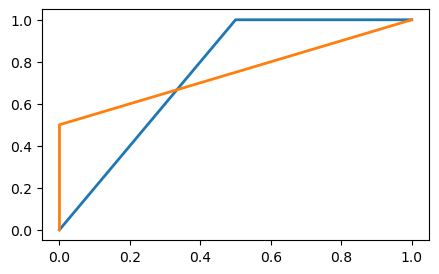

In [4]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(fpr, tpr, linewidth=2.0)
ax.plot(fpr2, tpr2, linewidth=2.0)

plt.show()

### Obtendo fpr

In [5]:
fpr

array([0. , 0.5, 1. ])

### Obtendo tpr

In [6]:
tpr

array([0., 1., 1.])

### Obtendo os limites

In [7]:
thresholds

array([inf,  1.,  0.])

### Calculando a área abaixo dessa curva

In [8]:
metrics.roc_auc_score(y_test,y_pred)

0.75

## Exibindo graficamente ambas

- Quanto maior a area coberta, maior o desempenho, nem sempre da pra saber

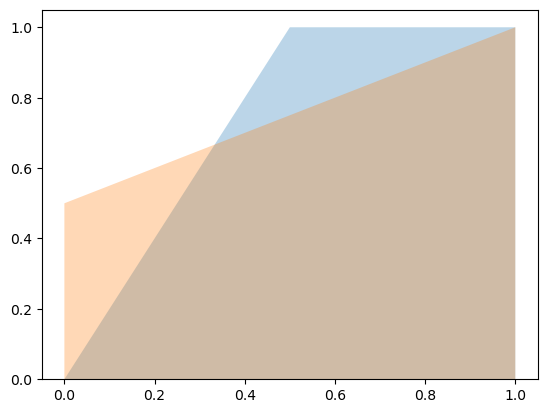

In [9]:
fig, ax = plt.subplots()

ax.stackplot(fpr, tpr, linewidth=2.0,alpha=0.3)
ax.stackplot(fpr2, tpr2, linewidth=2.0,alpha=0.3)

plt.show()

## Utilizando dados para entender a curva ROC

In [10]:
# Criando o dataframe
base = {
    'valores': [1,1.2,1.5,1.6,1.65,2.6,2.65,2.7,2.88,2.9],
    'classes': [0,0,0,0,0,1,1,1,1,1]
}

base = pd.DataFrame(base)

### Separando em X e y

In [11]:
X = base.valores
y = base.classes

### Treino e teste

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Plotando

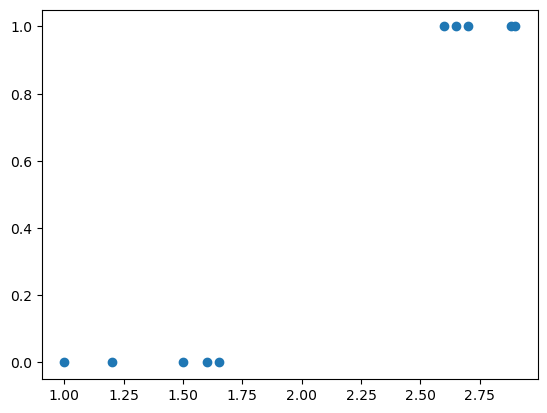

In [14]:
fig, ax = plt.subplots()

ax.scatter(X, y)

plt.show()

### Fazendo previsão com árvore de decisão

In [15]:
from sklearn import tree

### Instanciando e fazendo fit

In [16]:
clf = tree.DecisionTreeClassifier().fit(X_train.values.reshape(-1, 1),y_train)

### Previsão

In [17]:
y_pred = clf.predict(X_test.values.reshape(-1, 1))
y_pred

array([1, 0, 1, 0], dtype=int64)

### Verificando os valores reais
#### Predição acertou tudo

In [18]:
y_test

8    1
1    0
5    1
0    0
Name: classes, dtype: int64

### Traçando a curva
#### Classificador perfeito

In [19]:
# Determinando fpr e tpr
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

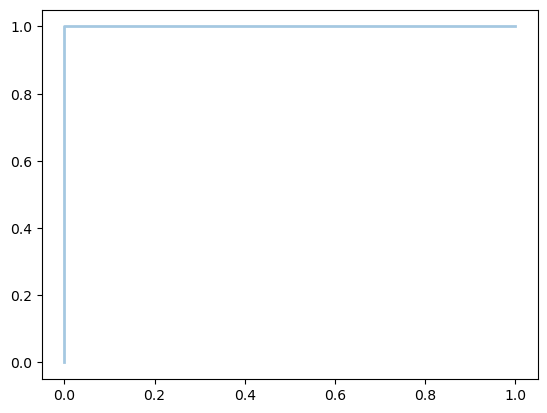

In [20]:
fig, ax = plt.subplots()

ax.plot(fpr, tpr, linewidth=2.0,alpha=0.4)

plt.show()

## E se alterarmos a classe de alguns elementos da nossa base inicial?

In [21]:
# Criando nova base de dados
base = {
    'valores': [1,1.2,1.5,1.6,1.65,2.6,2.65,2.7,2.88,2.9],
    'classes': [1,0,0,0,0,1,1,0,1,1]
}

base = pd.DataFrame(base)

In [22]:
# Separando em X e y
X = base.valores
y = base.classes

In [23]:
# E agora separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

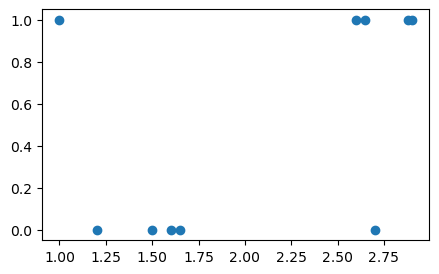

In [24]:
# Plotando os pontos
fig, ax = plt.subplots(figsize=(5, 3))

ax.scatter(X, y)

plt.show()

### Classificando com arvore de decisao e realizando predição

In [25]:
clf = tree.DecisionTreeClassifier().fit(X_train.values.reshape(-1, 1),y_train)

In [26]:
# Fazendo a previsão
y_pred = clf.predict_proba(X_test.values.reshape(-1, 1))[:,1]
y_pred

array([1., 0., 1., 0.])

In [27]:
# Verificando os valores reais
y_test

8    1
1    0
5    1
0    1
Name: classes, dtype: int64

### Visualizando a nova curva

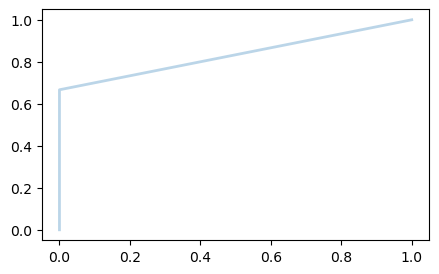

In [28]:
# Determinando fpr e tpr
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

# Traçando a curva utilizando os novos valores
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(fpr, tpr, linewidth=2.0,alpha=0.3)

plt.show()

In [29]:
# Visualizando confusion_matrix
metrics.confusion_matrix(y_test,y_pred)

array([[1, 0],
       [1, 2]], dtype=int64)

### Visualizando o fpr, tpr e limites

In [47]:
fpr

array([0., 0., 1.])

In [48]:
tpr

array([0.        , 0.66666667, 1.        ])

In [49]:
thresholds

array([inf,  1.,  0.])

### Utilizando  Regressão Logística para comparar resultados

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
# Instanciando e fazendo fit
clf2 = LogisticRegression(random_state=0).fit(X_train.values.reshape(-1,1), y_train)

### Predict 

In [60]:
y_predRL = clf2.predict(X_test.values.reshape(-1,1))
y_predRL

array([0, 0, 0, 0], dtype=int64)

### Predict_proba

A probabilidade de cada valor ser 0 ou 1. No predict acima, ele definiu o que havia maior probabilidade

In [58]:
clf2.predict_proba(X_test.values.reshape(-1,1))

array([[0.53406853, 0.46593147],
       [0.82401235, 0.17598765],
       [0.59170863, 0.40829137],
       [0.84700557, 0.15299443]])

### Decision_function
A certeza, confiança de cada valor para ser 0 ou 1

In [70]:
y_predRL = clf2.decision_function(X_test.values.reshape(-1,1))
y_predRL

array([-0.13648558, -1.54377169, -0.37103327, -1.71130575])

## O recomendado é traçar o grafico com base no decision_function e  Predict_proba

O decision_function é mais preciso, mas nao serve para todos os classificadores, ja o Proba sim, por isso devemos utiliza-lo

In [65]:
# Relembrando os valores de teste
y_test

8    1
1    0
5    1
0    1
Name: classes, dtype: int64

#### E então calculando a roc_curve para a regressão logística

In [66]:
fprRL, tprRL, thresholdsRL = metrics.roc_curve(y_test, y_predRL)

### Traçando a árvore de decisão e a regressão logística

Ja tinhamos o fpr e tpr da arvore de decisão

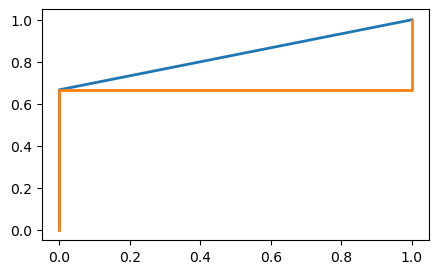

In [80]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(fpr, tpr, linewidth=2.0) # Arvore = Azul
ax.plot(fprRL, tprRL, linewidth=2.0) # Regressao = Laranja

plt.show()

# Lembrando: Quanto maior a area coberta, melhor o desempenho

### Podemos ver a curva, numericamente tambem:

In [82]:
metrics.auc(fpr,tpr)

0.8333333333333333

In [83]:
metrics.auc(fprRL,tprRL)

0.6666666666666666

# Área sob a Curva de Recuperação de Precisão (AUPRC)
### Precisao x Recall

Recomendada para datasets desbalanceados

In [71]:
# Calculando a curva
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
precisionRL, recallRL, thresholdsRL = metrics.precision_recall_curve(y_test, y_predRL)

### Traçando a árvore de decisão e a regressão logística

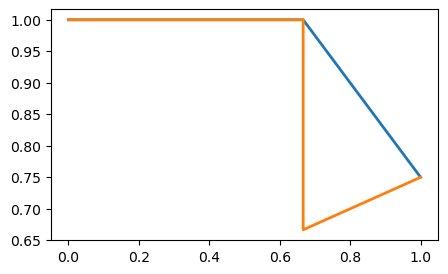

In [79]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(recall, precision, linewidth=2.0)
ax.plot(recallRL, precisionRL, linewidth=2.0)

plt.show()

### Verificando a precisão, Recall e limites

In [73]:
precisionRL

array([0.75      , 0.66666667, 1.        , 1.        , 1.        ])

In [74]:
recallRL

array([1.        , 0.66666667, 0.66666667, 0.33333333, 0.        ])

In [75]:
thresholdsRL

array([-1.71130575, -1.54377169, -0.37103327, -0.13648558])

**EXTRA: entendendo graficamente cada um dos valores do gráfico**

In [46]:
# A regressão logística também vai possuir um valor de coef_
clf.coef_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'coef_'

In [ ]:
# e um intercept_
clf.intercept_

In [ ]:
# Gerando os valores do gráfico da Regressão Logística
import numpy as np
valores_X = np.linspace(0, +4, 100)

from scipy.special import expit
log = expit(valores_X*clf.coef_ + clf.intercept_)

log_test = expit(X_test.values*clf.coef_ + clf.intercept_)

In [ ]:
# Importando o ipywidgets
import ipywidgets as widgets

In [ ]:
# Definindo a função para traçar o gráfico e exibir os valores de precisão e recall
def resultado(valor_y):
    fig, ax = plt.subplots()

    ax.scatter(X_train,y_train)
    ax.scatter(X_test,y_test)
    ax.plot(valores_X, log[0], color="red", linewidth=3)
    ax.scatter(X_test,log_test)
    plt.axhline(y = valor_y, color = 'b', linestyle = '--')

    plt.show()
    
    y_pred = [0 if x < valor_y else 1 for x in log_test[0]]
    
    print(metrics.confusion_matrix(y_test,y_pred))
    print('Precisão: {}'.format(metrics.precision_score(y_test,y_pred)))
    print('Recall: {}'.format(metrics.recall_score(y_test,y_pred)))

In [ ]:
# E agora criando esse gráfico
widgets.interact_manual(resultado,valor_y=(0,1,0.025));